In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
from ldaGibbs import LDAGibbs

gibbs = LDAGibbs(
    "data/ap.dat",
    "data/ap.txt",
    "data/vocab.txt",
    n_topics=10,
    n_iter=100,
)

gibbs.fit(verbose=False, early_stop=True)

100%|██████████| 100/100 [08:20<00:00,  5.01s/it]


Document:  At least 15 people died and 25,000 residents of Surat town were evacuated after torrential rains flooded the west Indian town, United News of India reported Friday. UNI said the victims lived in slum localities which were the worst affected in the deluge Thursday night. It said 25,000 slum residents lost their homes in the floods and were moved to relief camps. Surat in Gujarat state is 560 miles southwest of New Delhi. At least 50 people have drowned or died in collapsed houses across India since the monsoon broke this month, newspapers reported. Worst affected are northeastern Assam state and eastern Bihar state.
Topic: 10

Topic 1: predict, silver, federally, confidential, helms, looked, existing, showed, inspections, m
Topic 2: dukakis, bush, campaign, jackson, republican, democratic, going, presidential, reagan, think
Topic 3: kgb, willie, seats, nabisco, menorah, murdering, revised, brutal, wrong, boards
Topic 4: hightech, necessarily, outlook, iron, charge, ctk, frien

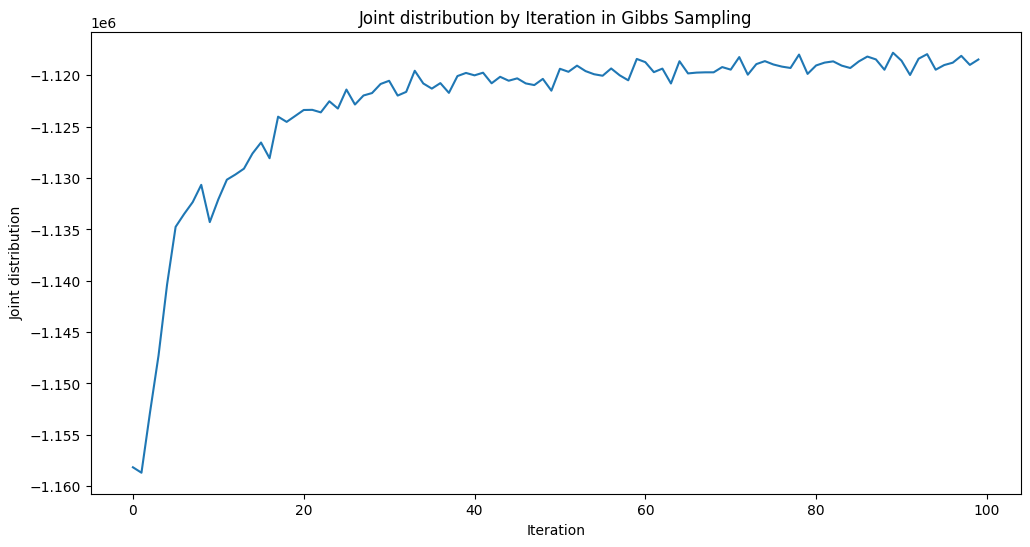

In [14]:
gibbs.show_doc_topic(10)
print()
gibbs.show_topics(10)
gibbs.plot_logs()

In [8]:
from ldaVI import LDAVI

vi = LDAVI(
    "data/ap.dat",
    "data/ap.txt",
    "data/vocab.txt",
    n_topics=10,
    n_iter=100,
)

vi.fit(verbose=False, early_stop=10)

100%|██████████| 100/100 [05:10<00:00,  3.11s/it]


Document:  At least 15 people died and 25,000 residents of Surat town were evacuated after torrential rains flooded the west Indian town, United News of India reported Friday. UNI said the victims lived in slum localities which were the worst affected in the deluge Thursday night. It said 25,000 slum residents lost their homes in the floods and were moved to relief camps. Surat in Gujarat state is 560 miles southwest of New Delhi. At least 50 people have drowned or died in collapsed houses across India since the monsoon broke this month, newspapers reported. Worst affected are northeastern Assam state and eastern Bihar state.
Topic: 9

Topic 1: dollar, market, sales, late, yen, says, workers, national, gold, york
Topic 2: west, east, air, city, time, united, officials, german, american, germany
Topic 3: soviet, party, gorbachev, south, bush, political, united, congress, told, aid
Topic 4: dukakis, bush, campaign, administration, told, going, republican, democratic, jackson, house
Topic

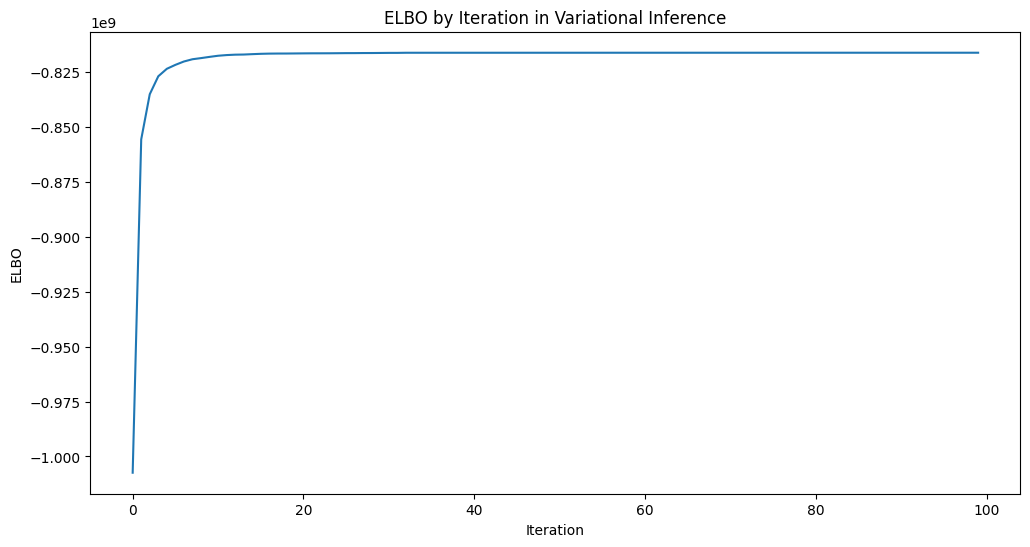

None


In [15]:
vi.show_doc_topic(10)
print()
vi.show_topics(10)
print()
print(vi.plot_logs())